<a href="https://colab.research.google.com/github/thieuhy/AI25/blob/ML/Coding_Exercise_ML_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: Predict house prices based on square footage and location.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Create a sample dataset representative of Silicon Valley
data = {
    'price':          [1500000, 2200000, 2800000, 1650000, 2500000, 3100000, 1550000, 2950000],
    'square_footage': [   1500,      1800,      2200,      1600,      2000,      2400,      1400,      2300],
    'location':       ['San Jose', 'Sunnyvale', 'Cupertino', 'San Jose', 'Sunnyvale', 'Cupertino', 'Santa Clara', 'Santa Clara']
}
df = pd.DataFrame(data)

print("--- Sample Silicon Valley Housing Data ---")
print(df)
print("\n" + "="*40 + "\n")


# Define features (X) and target (y)
X = df[['square_footage', 'location']]
y = df['price']

# 2. Define a preprocessor and model pipeline
# OneHotEncoder converts city names into a numerical format.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['square_footage']),
        ('cat', OneHotEncoder(), ['location'])
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# 3. Train the linear regression model
model.fit(X, y)

# 4. Predict the price for a new house (2000 sq ft in San Jose)
new_house = pd.DataFrame({
    'square_footage': [2000],
    'location': ['San Jose']
})
predicted_price = model.predict(new_house)

print(f"--> Predicted price for a 2000 sq ft house in San Jose: ${predicted_price[0]:,.2f}\n")


# 5. Examine the model coefficients to understand its logic
print("--- Model Interpretation ---")
ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['location'])
coefficients = model.named_steps['regressor'].coef_
intercept = model.named_steps['regressor'].intercept_

print(f"Model Intercept (Baseline Price): ${intercept:,.2f}\n")
print(f"Coefficient for 'square_footage': ${coefficients[0]:,.2f} per sq ft")
print("\nLocation price adjustments (relative to 'Cupertino'):")
for feature, coef in zip(ohe_feature_names, coefficients[1:]):
    location_name = feature.split('_')[1]
    print(f"  - {location_name}: ${coef:,.2f}")

--- Sample Silicon Valley Housing Data ---
     price  square_footage     location
0  1500000            1500     San Jose
1  2200000            1800    Sunnyvale
2  2800000            2200    Cupertino
3  1650000            1600     San Jose
4  2500000            2000    Sunnyvale
5  3100000            2400    Cupertino
6  1550000            1400  Santa Clara
7  2950000            2300  Santa Clara


--> Predicted price for a 2000 sq ft house in San Jose: $2,272,500.00

--- Model Interpretation ---
Model Intercept (Baseline Price): $-663,750.00

Coefficient for 'square_footage': $1,550.00 per sq ft

Location price adjustments (relative to 'Cupertino'):
  - Cupertino: $48,750.00
  - San Jose: $-163,750.00
  - Santa Clara: $46,250.00
  - Sunnyvale: $68,750.00


# Part 2: Predict Customer Churn:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Create a sample dataset with the new regions
data = {
    'age': [34, 45, 28, 52, 23, 39, 41, 55, 29, 33],
    'monthly_usage': [120, 250, 80, 300, 50, 180, 220, 350, 95, 150],
    'purchase_amount': [500, 1200, 300, 2500, 150, 800, 1100, 3000, 400, 650],
    'customer_service_calls': [4, 1, 5, 0, 6, 2, 1, 0, 4, 3],
    'region': ['South', 'North', 'East', 'South', 'East', 'West', 'South', 'West', 'East', 'South'],
    'churn': [1, 0, 1, 0, 1, 0, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

print("--- Sample Customer Dataset (Updated Regions) ---")
print(df)
print("\n" + "="*45 + "\n")

# Define features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# 2. Define preprocessing
numerical_features = ['age', 'monthly_usage', 'purchase_amount', 'customer_service_calls']
categorical_features = ['region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 3. Create and train the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=42))])
model.fit(X, y)

# 4. Predict churn for a new customer
new_customer = pd.DataFrame({
    'age': [48],
    'monthly_usage': [90],
    'purchase_amount': [250],
    'customer_service_calls': [5],
    'region': ['East']
})

churn_probability = model.predict_proba(new_customer)[0][1]
churn_classification = model.predict(new_customer)[0]

print(f"--- Prediction for New Customer ---")
print(f"Churn Probability: {churn_probability:.2f} ({churn_probability:.0%})")
print(f"Classification (1 = At-Risk): {churn_classification}")
print("\n" + "="*45 + "\n")

# 5. Interpret the new model coefficients
ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)
coefficients = model.named_steps['classifier'].coef_[0]

print("--- Model Coefficient Interpretation ---")
print("How each feature impacts the likelihood of churn:")
for feature, coef in zip(all_feature_names, coefficients):
    impact = "Increases" if coef > 0 else "Decreases"
    print(f"  - {feature}: {coef:.3f} ({impact} churn risk)")

--- Sample Customer Dataset (Updated Regions) ---
   age  monthly_usage  purchase_amount  customer_service_calls region  churn
0   34            120              500                       4  South      1
1   45            250             1200                       1  North      0
2   28             80              300                       5   East      1
3   52            300             2500                       0  South      0
4   23             50              150                       6   East      1
5   39            180              800                       2   West      0
6   41            220             1100                       1  South      0
7   55            350             3000                       0   West      0
8   29             95              400                       4   East      1
9   33            150              650                       3  South      1


--- Prediction for New Customer ---
Churn Probability: 0.78 (78%)
Classification (1 = At-Risk): 1


-

# Part 3: Customer Segmentation

--- Sample Customer Dataset ---
   customer_id  annual_spending  purchase_frequency  age region
0            1             1500                  20   28  South
1            2             1800                  25   32  South
2            3              500                   5   22   West
3            4             4500                  12   45   East
4            5             5000                  15   48   East




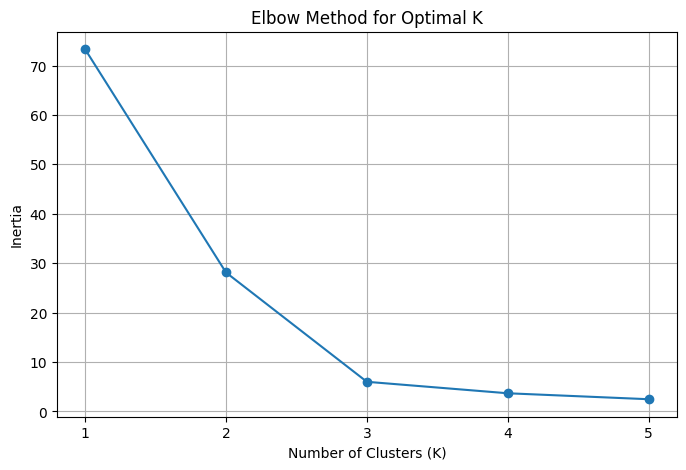

--- Cluster Analysis (Mean Values) ---
         annual_spending  purchase_frequency    age
cluster                                            
0                5128.57               14.29  49.57
1                 450.00                5.00  22.43
2                1300.00               18.50  28.83


--- Targeted Marketing Strategies ---

Cluster 0: High-Value Loyalists
  - Characteristics: High spending, frequent purchases, older.
  - Strategy: Offer VIP rewards, exclusive access to new products, personalized service.

Cluster 1: New & Cautious Spenders
  - Characteristics: Low spending, infrequent purchases, youngest.
  - Strategy: Target with entry-level offers, educational content, and welcome discounts.

Cluster 2: Young & Frequent
  - Characteristics: Moderate spending, very frequent purchases, younger.
  - Strategy: Implement a loyalty points system, offer bundles, engage on social media.

Customer segments saved to 'customer_segments.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Create a sample dataset
data = {
    'customer_id': range(1, 21),
    'annual_spending': [1500, 1800, 500, 4500, 5000, 800, 600, 4800, 5200, 1200,
                        1300, 250, 300, 6000, 5500, 900, 1100, 300, 400, 4900],
    'purchase_frequency': [20, 25, 5, 12, 15, 10, 8, 14, 16, 18,
                           22, 3, 4, 13, 17, 11, 15, 2, 3, 13],
    'age': [28, 32, 22, 45, 48, 25, 24, 49, 52, 30,
            29, 21, 23, 55, 51, 26, 28, 20, 22, 47],
    'region': ['South', 'South', 'West', 'East', 'East', 'West', 'West', 'East', 'East', 'South',
               'South', 'West', 'West', 'East', 'East', 'South', 'South', 'West', 'West', 'East']
}
df = pd.DataFrame(data)

print("--- Sample Customer Dataset ---")
print(df.head())
print("\n" + "="*35 + "\n")

# 2. Preprocess the data
# K-Means requires all features to be numerical and scaled.
numerical_features = ['annual_spending', 'purchase_frequency', 'age']
categorical_features = ['region']

# Create a preprocessor to scale numerical data and one-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline to apply the preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
processed_data = pipeline.fit_transform(df)

# 3. Use the Elbow Method to find the optimal K
inertia = []
K_range = range(1, 6)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('elbow_plot.png')
plt.show()

# 4. Apply K-Means with the optimal K (assumed to be 3 from the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(processed_data)

# 5. Analyze the resulting clusters
cluster_analysis = df.groupby('cluster')[numerical_features].mean().round(2)
print("--- Cluster Analysis (Mean Values) ---")
print(cluster_analysis)
print("\n" + "="*35 + "\n")

# 6. Suggest Targeted Strategies
print("--- Targeted Marketing Strategies ---")
for i, cluster in cluster_analysis.iterrows():
    if cluster['annual_spending'] > 3000 and cluster['purchase_frequency'] > 10:
        print(f"\nCluster {i}: High-Value Loyalists")
        print("  - Characteristics: High spending, frequent purchases, older.")
        print("  - Strategy: Offer VIP rewards, exclusive access to new products, personalized service.")
    elif cluster['annual_spending'] < 2000 and cluster['purchase_frequency'] > 15:
        print(f"\nCluster {i}: Young & Frequent")
        print("  - Characteristics: Moderate spending, very frequent purchases, younger.")
        print("  - Strategy: Implement a loyalty points system, offer bundles, engage on social media.")
    else:
        print(f"\nCluster {i}: New & Cautious Spenders")
        print("  - Characteristics: Low spending, infrequent purchases, youngest.")
        print("  - Strategy: Target with entry-level offers, educational content, and welcome discounts.")

# 7. Save the results to a CSV
df.to_csv('customer_segments.csv', index=False)
print("\nCustomer segments saved to 'customer_segments.csv'")

# Extra Credit:

In [ ]:
import pandas as pd
csv_data = pd.read_csv('/content/drive/MyDrive/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

# Display the first 5 rows of your data
csv_data.head()

# Get a concise summary of the DataFrame
csv_data.info()

# Generate descriptive statistics
csv_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26314 entries, 0 to 26313
Columns: 316 entries, RegionID to 2025-07-31
dtypes: float64(307), int64(3), object(6)
memory usage: 63.4+ MB


,RegionID,SizeRank,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31
count,26314.000000,26314.000000,26314.000000,1.289300e+04,1.295900e+04,1.297300e+04,1.299200e+04,1.305500e+04,1.306600e+04,1.308200e+04,...,2.631300e+04,2.631400e+04,2.631400e+04,2.631400e+04,2.631400e+04,2.631400e+04,2.631300e+04,2.631400e+04,2.631300e+04,2.631200e+04
mean,80489.095310,13760.590446,48307.664931,1.483622e+05,1.485048e+05,1.488483e+05,1.497258e+05,1.506608e+05,1.517367e+05,1.529293e+05,...,3.633791e+05,3.641272e+05,3.651693e+05,3.659428e+05,3.666230e+05,3.665319e+05,3.661338e+05,3.655285e+05,3.648676e+05,3.646169e+05
std,28316.473287,8386.077135,27388.322554,1.033563e+05,1.037011e+05,1.042620e+05,1.055024e+05,1.067662e+05,1.083335e+05,1.099833e+05,...,3.195363e+05,3.205492e+05,3.208858e+05,3.207201e+05,3.204261e+05,3.201463e+05,3.201052e+05,3.196680e+05,3.187295e+05,3.180619e+05
min,58196.000000,1.000000,1001.000000,3.961280e+03,3.959450e+03,3.952132e+03,3.944181e+03,3.927970e+03,3.918496e+03,3.939154e+03,...,2.539103e+04,2.558632e+04,2.603965e+04,2.610156e+04,2.597206e+04,2.589197e+04,2.596274e+04,2.655758e+04,2.688755e+04,2.674047e+04
25%,68861.250000,6656.250000,25969.500000,8.538802e+04,8.547784e+04,8.551347e+04,8.579202e+04,8.619768e+04,8.647856e+04,8.687073e+04,...,1.890927e+05,1.895752e+05,1.905169e+05,1.914366e+05,1.921749e+05,1.924341e+05,1.920416e+05,1.914306e+05,1.912585e+05,1.914246e+05
50%,78829.500000,13347.000000,47835.500000,1.231537e+05,1.232987e+05,1.234385e+05,1.238841e+05,1.244400e+05,1.250940e+05,1.256854e+05,...,2.796285e+05,2.801702e+05,2.814567e+05,2.823862e+05,2.834017e+05,2.835328e+05,2.834543e+05,2.827342e+05,2.827407e+05,2.831352e+05
75%,88637.250000,20323.000000,70358.750000,1.794711e+05,1.798074e+05,1.803672e+05,1.811587e+05,1.822311e+05,1.832605e+05,1.846131e+05,...,4.266099e+05,4.277697e+05,4.285715e+05,4.292066e+05,4.300217e+05,4.296950e+05,4.294824e+05,4.287696e+05,4.280520e+05,4.275080e+05
max,808739.000000,39992.000000,99929.000000,1.971195e+06,1.987807e+06,2.011894e+06,2.062861e+06,2.125454e+06,2.196480e+06,2.267776e+06,...,7.682998e+06,7.708322e+06,7.705270e+06,7.671246e+06,7.647066e+06,7.643644e+06,7.674849e+06,7.689075e+06,7.671637e+06,7.688133e+06


In [ ]:
print(csv_data['Metro'].unique())

['Houston-The Woodlands-Sugar Land, TX'
 'New York-Newark-Jersey City, NY-NJ-PA' 'El Paso, TX'
 'Austin-Round Rock-Georgetown, TX' 'Los Angeles-Long Beach-Anaheim, CA'
 'Chicago-Naperville-Elgin, IL-IN-WI'
 'Nashville-Davidson--Murfreesboro--Franklin, TN'
 'Atlanta-Sandy Springs-Alpharetta, GA'
 'Riverside-San Bernardino-Ontario, CA'
 'San Francisco-Oakland-Berkeley, CA' 'Dallas-Fort Worth-Arlington, TX'
 'Bakersfield, CA' 'San Antonio-New Braunfels, TX'
 'Brownsville-Harlingen, TX' 'San Diego-Chula Vista-Carlsbad, CA'
 'McAllen-Edinburg-Mission, TX' 'Oxnard-Thousand Oaks-Ventura, CA'
 'Santa Cruz-Watsonville, CA' 'Fresno, CA' 'Kennewick-Richland, WA'
 'Sacramento-Roseville-Folsom, CA'
 'Washington-Arlington-Alexandria, DC-VA-MD-WV' 'Raleigh-Cary, NC'
 'Oklahoma City, OK' 'Urban Honolulu, HI' 'Clarksville, TN-KY'
 'Phoenix-Mesa-Chandler, AZ' 'San Jose-Sunnyvale-Santa Clara, CA'
 'Visalia, CA' 'Kansas City, MO-KS' 'Charlotte-Concord-Gastonia, NC-SC'
 'Vallejo, CA' 'Orlando-Kissimmee-San

Training model and forecasting for San Jose...
Training model and forecasting for Sunnyvale...
Training model and forecasting for Santa Clara...
Training model and forecasting for Cupertino...
Training model and forecasting for Mountain View...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


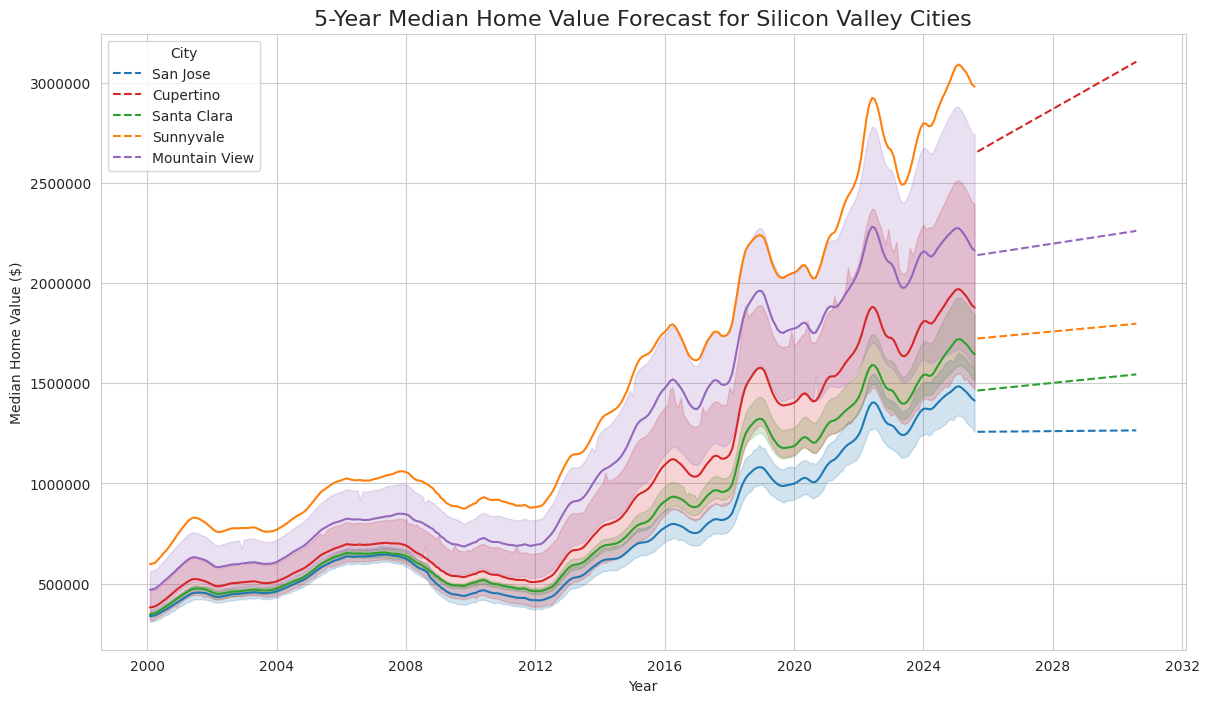

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Your existing data loading and cleaning code ##
# (Assuming 'csv_data' is already loaded from your Google Drive)

# 1. Define the specific metro area for the South Bay
south_bay_metro = 'San Jose-Sunnyvale-Santa Clara, CA'

# 2. Filter your original DataFrame to isolate just the South Bay
south_bay_df = csv_data[csv_data['Metro'] == south_bay_metro].copy()

##  Reshaping and Cleaning ##
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
value_vars = [col for col in south_bay_df.columns if col not in id_vars]
df_long = south_bay_df.melt(
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='date',
    value_name='median_price'
)
df_long['date'] = pd.to_datetime(df_long['date'])
df_long.dropna(subset=['median_price'], inplace=True)

## --- New Forecasting Logic --- ##

# 3. Define the cities and initialize a DataFrame to store forecasts
cities_to_plot = ['San Jose', 'Sunnyvale', 'Santa Clara', 'Cupertino', 'Mountain View']
historical_df = df_long[df_long['City'].isin(cities_to_plot)]
forecast_df = pd.DataFrame()

# 4. Loop through each city, train a model, and forecast its future
for city in cities_to_plot:
    print(f"Training model and forecasting for {city}...")

    # Isolate data for the current city
    city_df = df_long[df_long['City'] == city].copy()

    # Feature Engineering: Create a simple time index
    city_df['time_index'] = np.arange(len(city_df))

    X = city_df[['time_index']]
    y = city_df['median_price']

    # Train a separate Linear Regression model for this city
    model = LinearRegression()
    model.fit(X, y)

    # Create future time indices for the next 5 years (60 months)
    last_time_index = city_df['time_index'].iloc[-1]
    future_time_indices = np.arange(last_time_index + 1, last_time_index + 61).reshape(-1, 1)

    # Predict future prices
    future_prices = model.predict(future_time_indices)

    # Create future dates
    last_date = city_df['date'].iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=61, freq='MS')[1:]

    # Store the forecast
    temp_forecast_df = pd.DataFrame({'date': future_dates, 'median_price': future_prices, 'City': city})
    forecast_df = pd.concat([forecast_df, temp_forecast_df])

## --- Combined Visualization --- ##

# 5. Create the plot with both historical data and the forecast
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot historical data (solid lines)
sns.lineplot(data=historical_df, x='date', y='median_price', hue='City')

# Plot forecasted data (dashed lines)
sns.lineplot(data=forecast_df, x='date', y='median_price', hue='City', linestyle='--')

# Adjust legend to remove duplicate labels from the two plots
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='City')

plt.title('5-Year Median Home Value Forecast for Silicon Valley Cities', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Median Home Value ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# The DataFrame 'df_long' should already be created and cleaned from the previous step,
# focusing on the 'San Jose-Sunnyvale-Santa Clara, CA' metro.

# --- Step 1: Feature Engineering ---
# Create features from the date that a model can use
df_long['year'] = df_long['date'].dt.year
df_long['month'] = df_long['date'].dt.month

# For the model, we'll focus on more recent data to capture current trends
df_model = df_long[df_long['year'] >= 2015].copy()

# --- Step 2: Model Training & Evaluation ---

# Define our features (X) and the target we want to predict (y)
# We use 'RegionName' as it's the unique ID for a ZIP code
X = df_model[['year', 'month', 'RegionName']]
y = df_model['median_price']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessor to handle our different feature types.
# 'year' and 'month' are numerical.
# 'RegionName' (the ZIP code) is categorical and needs to be one-hot encoded.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['year', 'month']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['RegionName'])
    ])

# Create the full model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Train the model on the training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Model Performance ---")
print(f"R-squared (R²): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

Training the model...
Model training complete.

--- Model Performance ---
R-squared (R²): 0.96
Root Mean Squared Error (RMSE): $166,157.71
